In [1]:
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [2]:
xl = pd.ExcelFile(r"C:\Users\shyam\Desktop\project\MAX_TEMP.xls")
xl.sheet_names
df = xl.parse("MAX TEMP")
df.head(100)

,DATE,MAX-TEMP
0,1983-01-01,32.0
1,1983-01-02,33.0
2,1983-01-03,29.0
3,1983-01-04,30.0
4,1983-01-05,33.0
...,...,...
95,1983-04-06,33.0
96,1983-04-07,33.0
97,1983-04-08,33.0
98,1983-04-09,33.0


In [3]:
df.index = np.arange(1, len(df) + 1)
df.columns = ['Date','MAX_TEMP']
df.head()

,Date,MAX_TEMP
1,1983-01-01,32.0
2,1983-01-02,33.0
3,1983-01-03,29.0
4,1983-01-04,30.0
5,1983-01-05,33.0


In [4]:
df.isnull().sum(axis=0)

Date        0
MAX_TEMP    0
dtype: int64

In [5]:
df.describe()

,MAX_TEMP
count,9089.000000
mean,31.862096
std,2.233595
min,24.000000
25%,30.500000
50%,32.000000
75%,33.500000
max,37.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9089 entries, 1 to 9089
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9089 non-null   datetime64[ns]
 1   MAX_TEMP  9089 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 213.0 KB


In [7]:
df['Month'] = df['Date'].dt.strftime('%b')
df.head()

,Date,MAX_TEMP,Month
1,1983-01-01,32.0,Jan
2,1983-01-02,33.0,Jan
3,1983-01-03,29.0,Jan
4,1983-01-04,30.0,Jan
5,1983-01-05,33.0,Jan


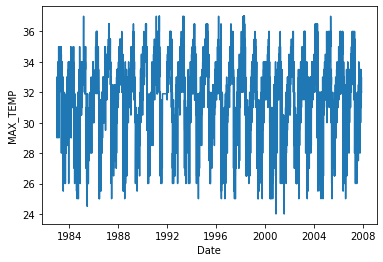

In [8]:
x = df.Date
y = df.MAX_TEMP
sns.lineplot(x = x, y = y, data = df)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [9]:
df.isnull().sum()

Date        0
MAX_TEMP    0
Month       0
dtype: int64

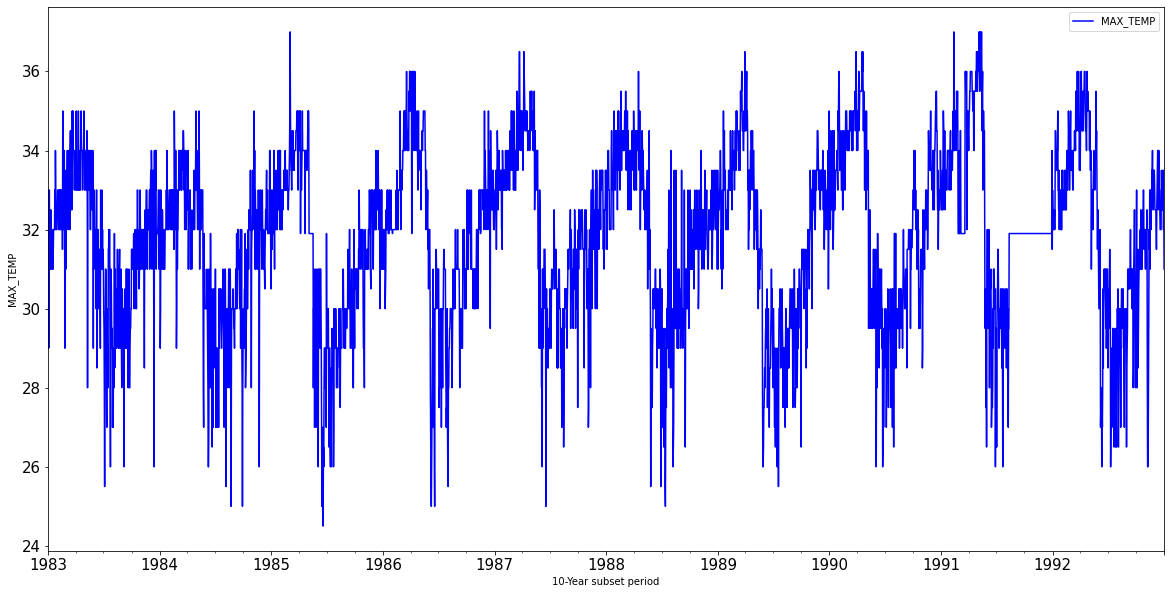

In [10]:
df1=df.copy()
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace=True)
df1 = df1['1983-01-01':'1992-12-31']

curve = df1.plot(color='blue', fontsize=15)
plt.xlabel('10-Year subset period')
plt.ylabel('MAX_TEMP')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

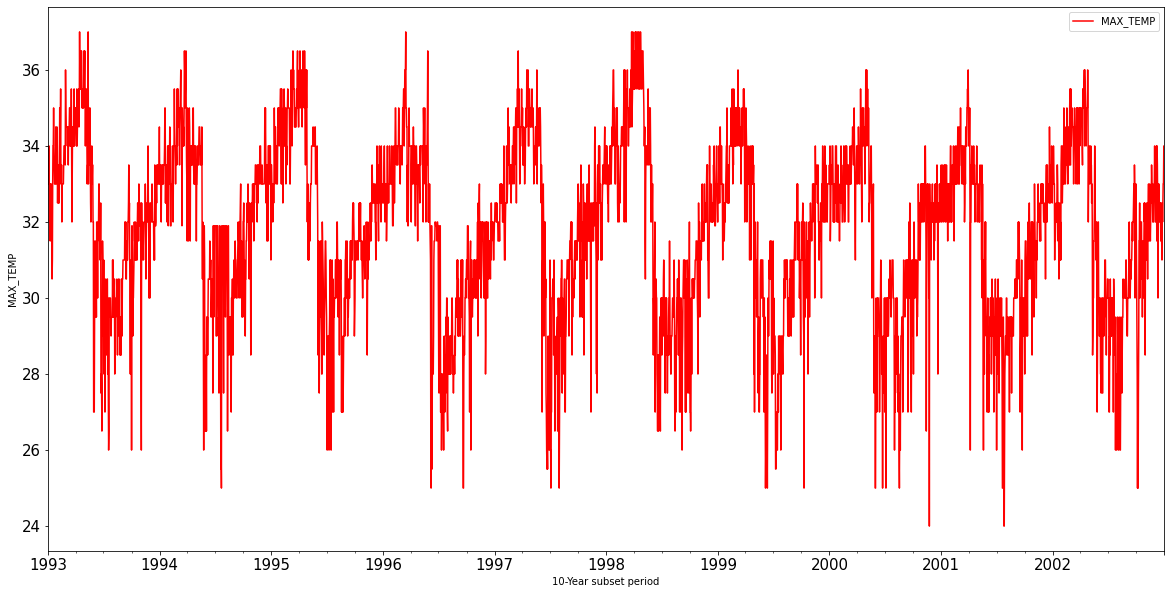

In [11]:
df2=df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date',inplace=True)
df2 = df2['1993-01-01':'2002-12-31']
curve = df2.plot(color='red', fontsize=15)
plt.xlabel('10-Year subset period')
plt.ylabel('MAX_TEMP')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [12]:
# Checking for monthly time scale
df4=df
df4['Month_Year'] = df['Date'].dt.strftime('%y-%b')
df4=df.groupby(df.Month_Year,sort=False)['MAX_TEMP'].mean()
df4.head(12)

Month_Year
83-Jan    31.822581
83-Feb    32.535714
83-Mar    33.532258
83-Apr    33.716667
83-May    33.032258
83-Jun    31.283333
83-Jul    29.564516
83-Aug    29.738710
83-Sep    29.616667
83-Oct    31.303226
83-Nov    31.850000
83-Dec    32.225806
Name: MAX_TEMP, dtype: float64

Text(0, 0.5, 'monthly average')

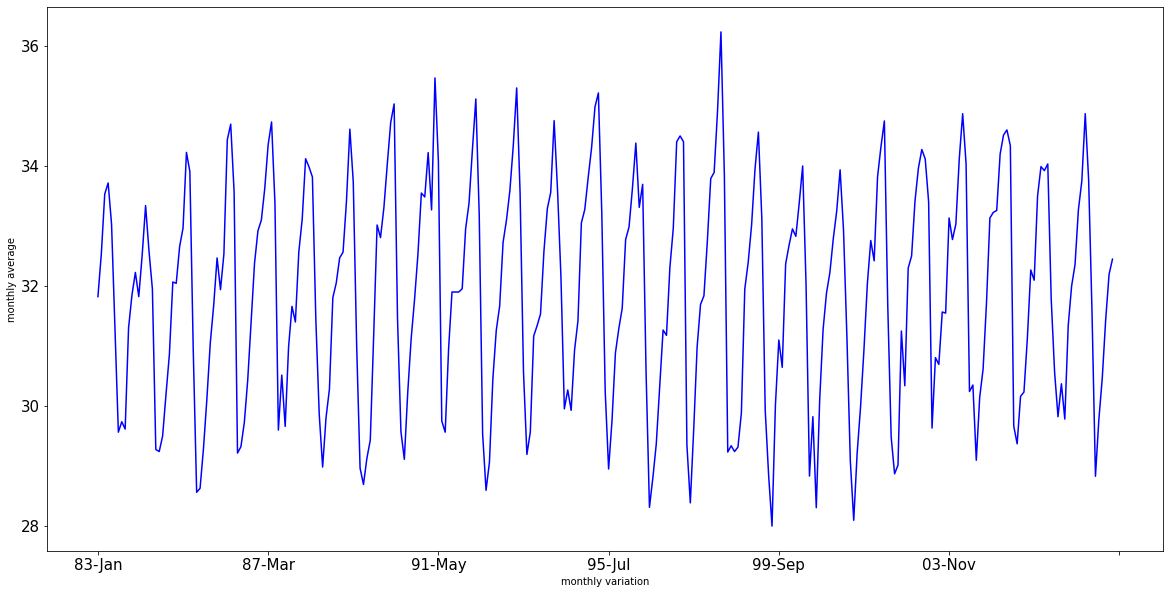

In [13]:
curve = df4.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('monthly variation')
plt.ylabel('monthly average')

In [14]:
# Checking for Annual time scale
df['Year']=df['Date'].dt.strftime('%y')
df.head()

,Date,MAX_TEMP,Month,Month_Year,Year
1,1983-01-01,32.0,Jan,83-Jan,83
2,1983-01-02,33.0,Jan,83-Jan,83
3,1983-01-03,29.0,Jan,83-Jan,83
4,1983-01-04,30.0,Jan,83-Jan,83
5,1983-01-05,33.0,Jan,83-Jan,83


In [15]:
df5 = df.groupby(df.Year,sort=False)['MAX_TEMP'].mean()
df5.head(10)

Year
83    31.678904
84    31.279781
85    31.363014
86    31.878630
87    32.123288
88    31.803279
89    31.532877
90    32.189945
91    32.356164
92    31.842896
Name: MAX_TEMP, dtype: float64

Text(0, 0.5, 'Annual average')

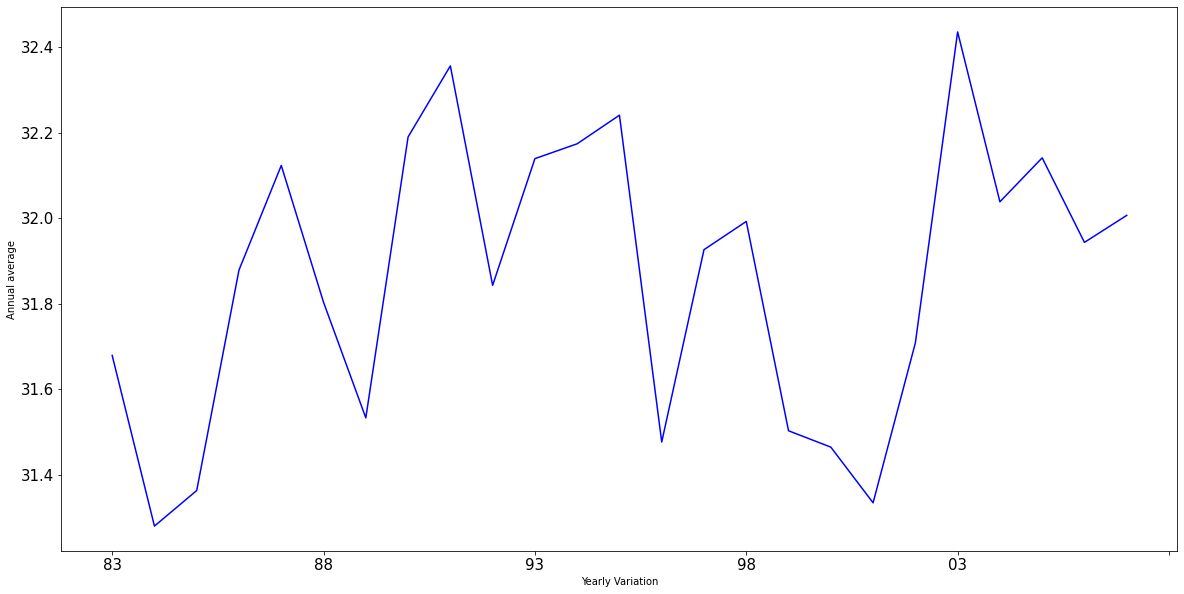

In [16]:
curve = df5.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Yearly Variation')
plt.ylabel('Annual average')

In [17]:
#Monsoon season consists of June, July, August and Septemeber
def season_categoriser(x):
    if x.month==6 or x.month==7 or x.month==8 or x.month ==9:
        x='Monsoon only'+' '+str(x.year)
    else:
        x='Non-Monsoon'+' '+str(x.year)
    return x

In [18]:
df6=df
df6['Season'] = df['Date'].apply(season_categoriser)
df6.head(180)

,Date,MAX_TEMP,Month,Month_Year,Year,Season
1,1983-01-01,32.0,Jan,83-Jan,83,Non-Monsoon 1983
2,1983-01-02,33.0,Jan,83-Jan,83,Non-Monsoon 1983
3,1983-01-03,29.0,Jan,83-Jan,83,Non-Monsoon 1983
4,1983-01-04,30.0,Jan,83-Jan,83,Non-Monsoon 1983
5,1983-01-05,33.0,Jan,83-Jan,83,Non-Monsoon 1983
...,...,...,...,...,...,...
176,1983-06-25,31.5,Jun,83-Jun,83,Monsoon only 1983
177,1983-06-26,33.0,Jun,83-Jun,83,Monsoon only 1983
178,1983-06-27,31.0,Jun,83-Jun,83,Monsoon only 1983
179,1983-06-28,32.0,Jun,83-Jun,83,Monsoon only 1983


In [19]:
df7 = df6[df6['Season'].str.contains('Non-Monsoon')]
df8 = df6[df6['Season'].str.contains('Monsoon only')]

In [20]:
df7 = df7.groupby(df7.Season,sort=False)['MAX_TEMP'].mean()
df7.head(10)

Season
Non-Monsoon 1983    32.499588
Non-Monsoon 1984    32.144262
Non-Monsoon 1985    32.475720
Non-Monsoon 1986    32.986420
Non-Monsoon 1987    33.094650
Non-Monsoon 1988    32.840164
Non-Monsoon 1989    32.777778
Non-Monsoon 1990    33.288066
Non-Monsoon 1991    33.269547
Non-Monsoon 1992    33.063525
Name: MAX_TEMP, dtype: float64

In [21]:
df8 = df8.groupby(df8.Season,sort=False)['MAX_TEMP'].mean()
df8.head(10)

Season
Monsoon only 1983    30.044262
Monsoon only 1984    29.550820
Monsoon only 1985    29.146721
Monsoon only 1986    29.672131
Monsoon only 1987    30.188525
Monsoon only 1988    29.729508
Monsoon only 1989    29.053279
Monsoon only 1990    30.002705
Monsoon only 1991    30.536885
Monsoon only 1992    29.401639
Name: MAX_TEMP, dtype: float64

Text(0, 0.5, 'Seasonal Average')

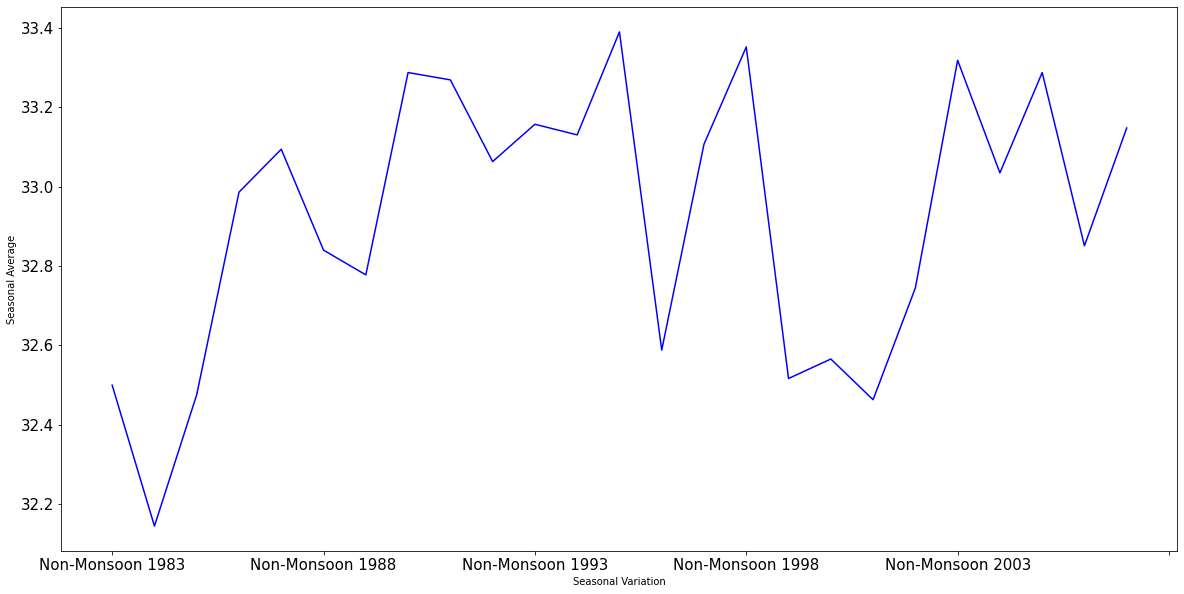

In [22]:
curve = df7.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Seasonal Variation')
plt.ylabel('Seasonal Average')

Text(0, 0.5, 'Seasonal Average')

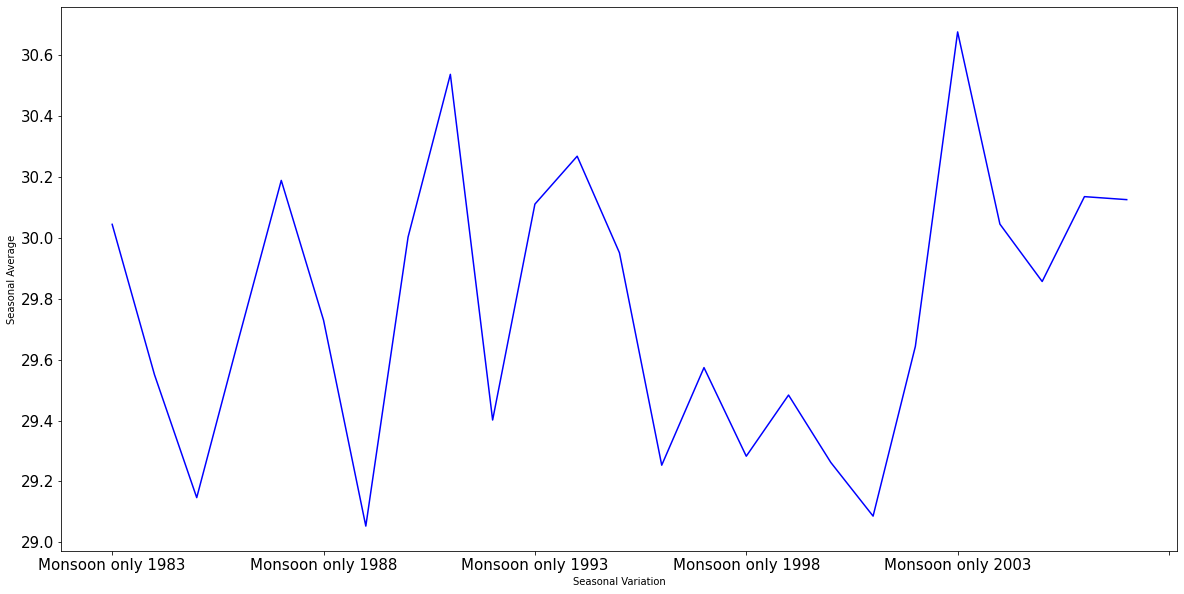

In [23]:
curve = df8.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Seasonal Variation')
plt.ylabel('Seasonal Average')

In [24]:
#Mann-Kendall test for trend analysis
import pip
pip.main(['install','pymannkendall'])
import pymannkendall as mk

stat1= mk.original_test(df['MAX_TEMP'])
print(stat1)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Mann_Kendall_Test(trend='increasing', h=True, p=0.00268190572902105, z=3.0020245198856044, Tau=0.02094342100573515, s=864972.0, var_s=83018450616.66667, slope=0.0, intercept=32.0)


In [25]:
df4= pd.DataFrame(df4)
stat2= mk.original_test(df4['MAX_TEMP'])
print(stat2)

Mann_Kendall_Test(trend='no trend', h=False, p=0.5108409192598855, z=0.6575288617291205, Tau=0.025521312652914636, s=1137.0, var_s=2984881.0, slope=0.0008618566855454619, intercept=31.821583353853725)


In [26]:
df5 = pd.DataFrame(df5)
stat3 = mk.original_test(df5['MAX_TEMP'])
print(stat3)

Mann_Kendall_Test(trend='no trend', h=False, p=0.29327072669776233, z=1.0509735746180562, Tau=0.15333333333333332, s=46.0, var_s=1833.3333333333333, slope=0.010246263669708355, intercept=31.803346205826514)


In [27]:
df7 = pd.DataFrame(df7)
stat4 = mk.seasonal_test(df7['MAX_TEMP'])
print(stat4)

Seasonal_Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0, Tau=0.0, s=0.0, var_s=14.666666666666666, slope=0.01040857113944682, intercept=33.02455044525399)


In [28]:
df8 = pd.DataFrame(df8)
stat5 = mk.seasonal_test(df7['MAX_TEMP'])
print(stat5)

Seasonal_Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0, Tau=0.0, s=0.0, var_s=14.666666666666666, slope=0.01040857113944682, intercept=33.02455044525399)


In [29]:
#Sen-slope estimator for trend analysis
stat5= mk.sens_slope(df['MAX_TEMP'])
print(stat5)

Sens_Slope_Test(slope=0.0, intercept=32.0)


In [30]:
stat6= mk.sens_slope(df4['MAX_TEMP'])
print(stat6)

Sens_Slope_Test(slope=0.0008618566855454619, intercept=31.821583353853725)


In [31]:
stat7= mk.sens_slope(df5['MAX_TEMP'])
print(stat7)

Sens_Slope_Test(slope=0.010246263669708355, intercept=31.803346205826514)


In [32]:
stat8= mk.sens_slope(df7['MAX_TEMP'])
print(stat8)

Sens_Slope_Test(slope=0.012512749401268824, intercept=32.88480602357822)


In [33]:
stat8= mk.sens_slope(df8['MAX_TEMP'])
print(stat8)

Sens_Slope_Test(slope=0.007994364754098338, intercept=29.63357581967213)


In [34]:
# Change point analysis using Petit's test
import pip
pip.main(['install','pyhomogeneity'])
import pyhomogeneity as hg
stat9 = hg.pettitt_test(df['MAX_TEMP'])
df['MAX_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MAX_TEMP_daily.xls', index=False)
print(stat9)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
C:\Users\shyam\AppData\Local\Temp/ipykernel_16556/1601113961.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df['MAX_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MAX_TEMP_daily.xls', index=False)


Pettitt_Test(h=True, cp=2492, p=0.0, U=1426092.0, avg=mean(mu1=31.633587479935798, mu2=31.948414733969983))


In [35]:
stat10 = hg.pettitt_test(df4['MAX_TEMP'])
df4['MAX_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MAX_TEMP_month.xls', index=False)
print(stat10)

Pettitt_Test(h=False, cp=82, p=0.80745, U=1822.0, avg=mean(mu1=31.642930540321608, mu2=31.96013660007988))


C:\Users\shyam\AppData\Local\Temp/ipykernel_16556/703179842.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df4['MAX_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MAX_TEMP_month.xls', index=False)


In [36]:
stat11 = hg.pettitt_test(df5['MAX_TEMP'])
df5['MAX_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MAX_TEMP_yearly.xls', index=False)
print(stat11)

Pettitt_Test(h=False, cp=7, p=0.27745, U=64.0, avg=mean(mu1=31.66568177686525, mu2=31.939595563455207))


C:\Users\shyam\AppData\Local\Temp/ipykernel_16556/746269215.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df5['MAX_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MAX_TEMP_yearly.xls', index=False)


In [37]:
stat12 = hg.pettitt_test(df7['MAX_TEMP'])
df7['MAX_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MAX_TEMP_non-monsoon.xls', index=False)
print(stat12)

Pettitt_Test(h=False, cp=7, p=0.14865, U=74.0, avg=mean(mu1=32.68836894401557, mu2=33.01553193725206))


C:\Users\shyam\AppData\Local\Temp/ipykernel_16556/1574011256.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df7['MAX_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MAX_TEMP_non-monsoon.xls', index=False)


In [38]:
stat12 = hg.pettitt_test(df8['MAX_TEMP'])
df8['MAX_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MAX_TEMP_monsoon.xls', index=False)
print(stat12)

Pettitt_Test(h=False, cp=20, p=0.24875, U=66.0, avg=mean(mu1=29.662061475409836, mu2=30.16770491803279))


C:\Users\shyam\AppData\Local\Temp/ipykernel_16556/335607359.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df8['MAX_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MAX_TEMP_monsoon.xls', index=False)
